In [79]:
# Import Dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc
import matplotlib
import matplotlib.pyplot as plt

In [26]:
# Create a connection to connect to 
engine = create_engine("sqlite:///hawaii.sqlite", echo=True)

# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

2018-04-04 00:09:30,335 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-04-04 00:09:30,340 INFO sqlalchemy.engine.base.Engine ()
2018-04-04 00:09:30,346 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-04-04 00:09:30,376 INFO sqlalchemy.engine.base.Engine ()
2018-04-04 00:09:30,385 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2018-04-04 00:09:30,389 INFO sqlalchemy.engine.base.Engine ()
2018-04-04 00:09:30,423 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("measurement")
2018-04-04 00:09:30,426 INFO sqlalchemy.engine.base.Engine ()
2018-04-04 00:09:30,442 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'measurement' AND type = 'table'
2018-04-04 00:09:30,445 INFO sqlalchemy.engine.base.Engine ()
2018-04-04 00:09:30,449 INFO sqlalchemy.

['measurement', 'station']

In [27]:
# Save a reference to the tables as `Measurement` & `Invoice`
Station = Base.classes.station
Measurement = Base.classes.measurement

# Precipitation Analysis

In [28]:
# Import Dependencies
import datetime as dt
import numpy as np

In [29]:
# Create a database session object
session = Session(engine)

In [55]:
# Retreive last 12 months of precipitation data
date = dt.datetime(2016, 8, 22)

sel = [Measurement.date, Measurement.prcp]
latestoneyr_prcp = session.query(*sel).filter(Measurement.date > date).all()

latestoneyr_prcp

2018-04-04 13:20:14,358 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date > ?
2018-04-04 13:20:14,363 INFO sqlalchemy.engine.base.Engine ('2016-08-22 00:00:00.000000',)


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', 0.0),
 ('2016-09-06', 0.0),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 

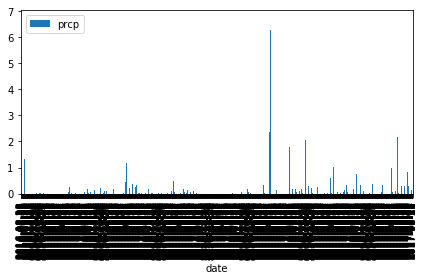

In [62]:
# Plot the Results in a Matplotlib bar chart
prcp_df = pd.DataFrame(latestoneyr_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)

prcp_df.plot.bar()
plt.tight_layout()
plt.show()

In [63]:
print(prcp_df.describe())

              prcp
count  2230.000000
mean      0.160664
std       0.442067
min       0.000000
25%       0.000000
50%       0.010000
75%       0.110000
max       6.700000


# Station Analysis

In [68]:
# Query to calculate the total number of stations
station_sel = [func.count(Station.station)]
station_count = session.query(*station_sel).all()
station_count

2018-04-04 13:42:44,645 INFO sqlalchemy.engine.base.Engine SELECT count(station.station) AS count_1 
FROM station
2018-04-04 13:42:44,649 INFO sqlalchemy.engine.base.Engine ()


[(9)]

In [80]:
# Most active stations
active_sel = [Measurement.station, func.count(Measurement.date), func.sum(Measurement.tobs)]
active_stations = session.query(*active_sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date), func.sum(Measurement.tobs).desc()).all()
active_stations

2018-04-04 18:22:49,728 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, count(measurement.date) AS count_1, sum(measurement.tobs) AS sum_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.date), sum(measurement.tobs) DESC
2018-04-04 18:22:49,732 INFO sqlalchemy.engine.base.Engine ()


[('USC00518838', 511, 37162),
 ('USC00517948', 1372, 102467),
 ('USC00511918', 1979, 141728),
 ('USC00514830', 2202, 164871),
 ('USC00516128', 2612, 185230),
 ('USC00519523', 2669, 198957),
 ('USC00513117', 2709, 196915),
 ('USC00519397', 2724, 203083),
 ('USC00519281', 2772, 198652)]

Highest Number of Oberservations = USC00519281

In [78]:
# Retreive last 12 months of observation data
date = dt.datetime(2016, 8, 22)

sel = [Measurement.date, Measurement.tobs]
latestoneyr_tobs = session.query(*sel).filter(Measurement.date > date).all()

latestoneyr_tobs

2018-04-04 18:19:12,774 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date > ?
2018-04-04 18:19:12,780 INFO sqlalchemy.engine.base.Engine ('2016-08-22 00:00:00.000000',)


[('2016-08-23', 81),
 ('2016-08-24', 79),
 ('2016-08-25', 80),
 ('2016-08-26', 79),
 ('2016-08-27', 77),
 ('2016-08-28', 78),
 ('2016-08-29', 78),
 ('2016-08-30', 79),
 ('2016-08-31', 80),
 ('2016-09-01', 81),
 ('2016-09-02', 80),
 ('2016-09-03', 79),
 ('2016-09-04', 75),
 ('2016-09-05', 79),
 ('2016-09-06', 76),
 ('2016-09-07', 76),
 ('2016-09-08', 80),
 ('2016-09-09', 79),
 ('2016-09-10', 78),
 ('2016-09-11', 76),
 ('2016-09-12', 78),
 ('2016-09-13', 78),
 ('2016-09-14', 75),
 ('2016-09-15', 79),
 ('2016-09-16', 80),
 ('2016-09-17', 79),
 ('2016-09-18', 81),
 ('2016-09-19', 77),
 ('2016-09-20', 77),
 ('2016-09-21', 78),
 ('2016-09-22', 76),
 ('2016-09-23', 82),
 ('2016-09-24', 81),
 ('2016-09-25', 78),
 ('2016-09-26', 80),
 ('2016-09-27', 80),
 ('2016-09-28', 79),
 ('2016-09-29', 80),
 ('2016-09-30', 80),
 ('2016-10-01', 80),
 ('2016-10-02', 79),
 ('2016-10-03', 79),
 ('2016-10-04', 79),
 ('2016-10-05', 80),
 ('2016-10-06', 80),
 ('2016-10-07', 79),
 ('2016-10-08', 78),
 ('2016-10-09

In [ ]:
latestoneyr_tobs = session.query(*sel).filter(Measurement.date > date).filterall()